In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import os
import enzope

In [10]:
def run(t_s, f, w_min, reps):
    for _ in tqdm(range(reps)):
        model = enzope.CPUModel(n_agents=1000, f=f, w_min=w_min, measure_every=1)
        
        for i, t in enumerate(t_s):
            model.MCS(t)
            w_s[i].append(model.w)

    # Save w_s
    for i, t in enumerate(t_s):
        np.save(f'data/2/w_t={t}_f={f}_w_min={w_min}.npy', w_s[i])

In [15]:
reps = 10
t_s = [2000, 5000, 50000, 100000, 200000]
f=.2
# w_min = 1e-10
w_s = [[] for _ in t_s]

for w_min in [3e-17, 1e-10]:
    run(t_s, f, w_min, reps)

100%|██████████| 10/10 [5:39:54<00:00, 2039.45s/it] 


In [4]:
w_t1 = np.load(f'data/w_t1={t1}.npy')
w_t2 = np.load(f'data/w_t2={t2}.npy')
w_t3 = np.load(f'data/w_t3={t3}.npy')

w_t1 = np.array(w_t1).flatten()
w_t2 = np.array(w_t2).flatten()
w_t3 = np.array(w_t3).flatten()

In [5]:
n = len(w_t1)
n_actives_t1 = len(w_t1[w_t1 > 3e-17]) / n
n_actives_t2 = len(w_t2[w_t2 > 3e-17]) / n
n_actives_t3 = len(w_t3[w_t3 > 3e-17]) / n

print(f'At t1: {n_actives_t1:.2f}')
print(f'At t2: {n_actives_t2:.2f}')
print(f'At t3: {n_actives_t3:.2f}')

At t1: 0.39
At t2: 0.36
At t3: 0.34


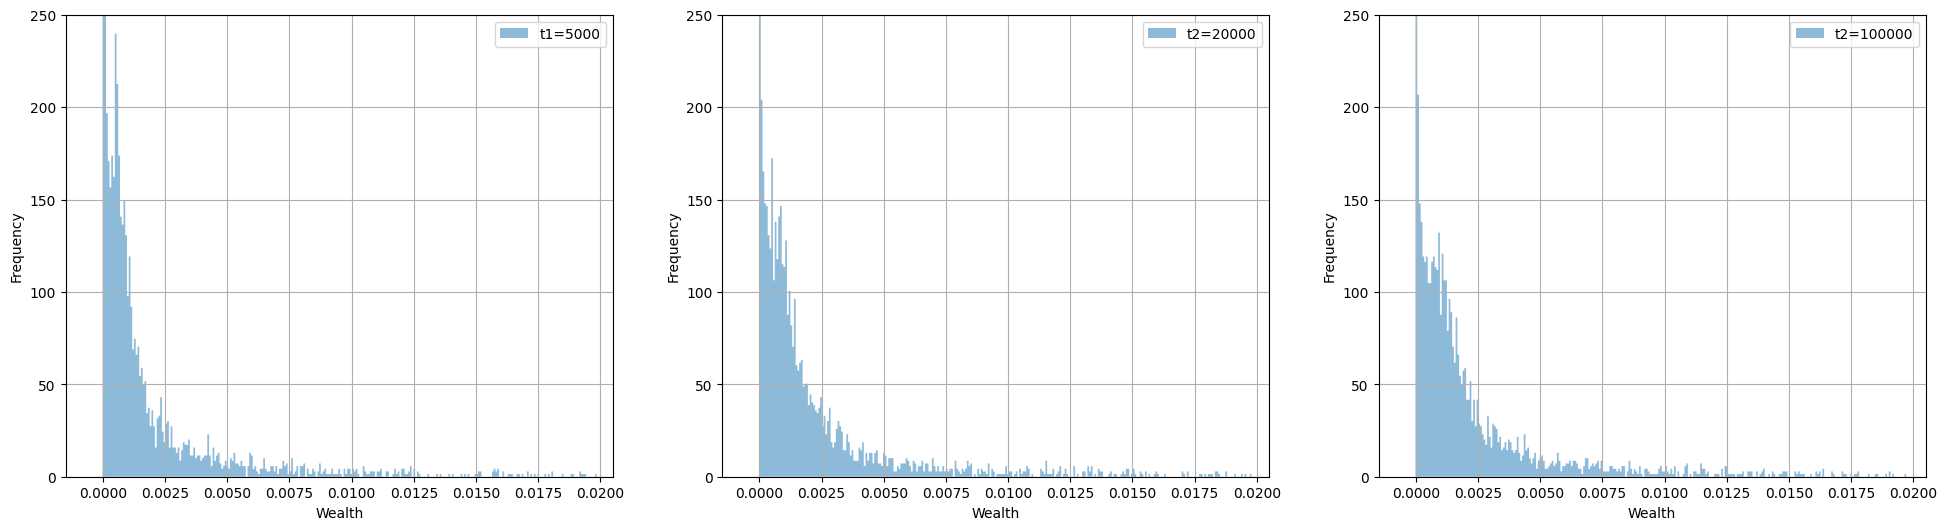

In [6]:
# Two plots side by side
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(24, 6))

xmin = -.001
xmax = .02

bines = np.linspace(xmin, xmax, 300)
    
ax1.hist(w_t1, bins=bines, label=f't1={t1}', alpha=.5, histtype='stepfilled', density=True)
ax1.legend()
ax1.set_xlabel('Wealth')
ax1.set_ylabel('Frequency')
ax1.grid()

ax2.hist(w_t2, bins=bines, label=f't2={t2}', alpha=.5, histtype='stepfilled', density=True)
ax2.legend()
ax2.set_xlabel('Wealth')
ax2.set_ylabel('Frequency')
ax2.grid()

ax3.hist(w_t3, bins=bines, label=f't2={t3}', alpha=.5, histtype='stepfilled', density=True)
ax3.legend()
ax3.set_xlabel('Wealth')
ax3.set_ylabel('Frequency')
ax3.grid()

ymax = 250
ax1.set_ylim(0, ymax)
ax2.set_ylim(0, ymax)
ax3.set_ylim(0, ymax)
margins = .0005
ax1.set_xlim(xmin - margins, xmax + margins)
ax2.set_xlim(xmin - margins, xmax + margins)
ax3.set_xlim(xmin - margins, xmax + margins);

/tmp/ipykernel_33545/2493436166.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, ymax)
/tmp/ipykernel_33545/2493436166.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, ymax)
/tmp/ipykernel_33545/2493436166.py:38: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax3.set_ylim(0, ymax)


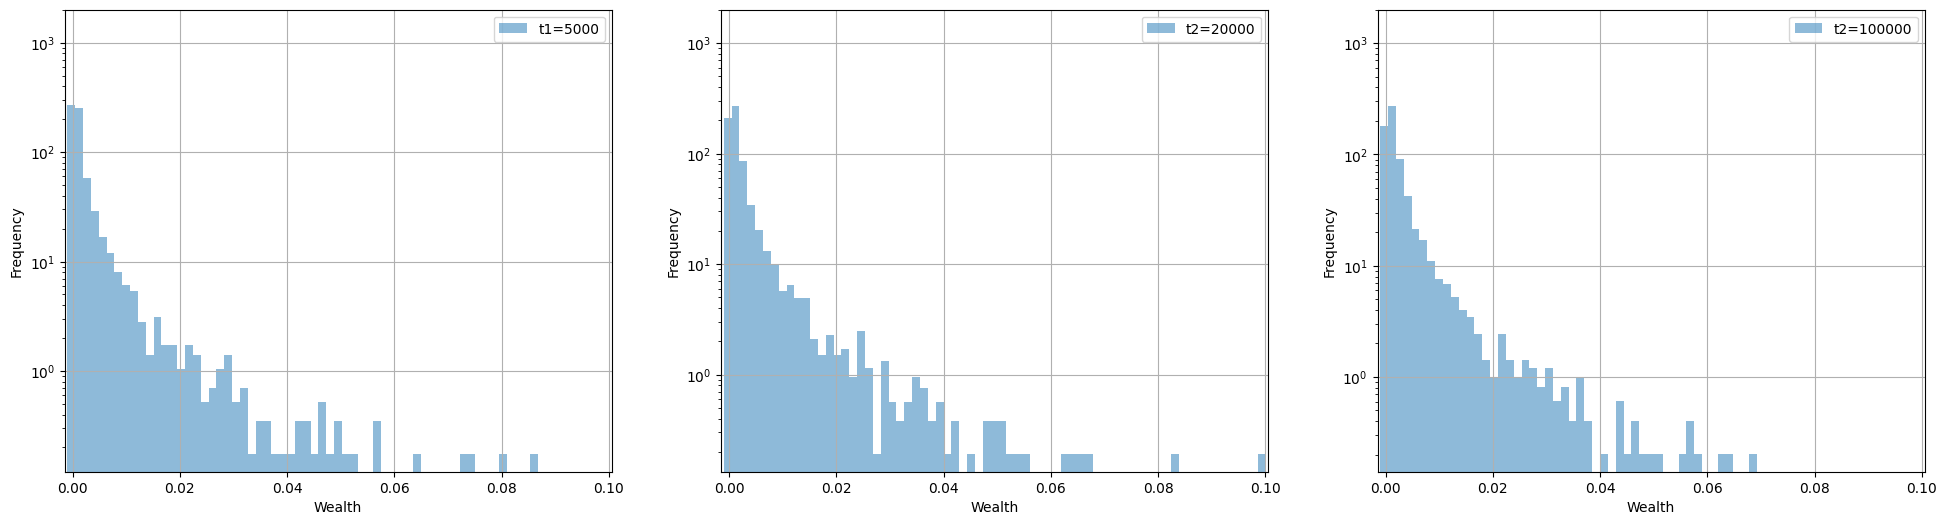

In [8]:
w_t1 = w_t1[w_t1 > 3e-17]
w_t2 = w_t2[w_t2 > 3e-17]
w_t3 = w_t3[w_t3 > 3e-17]

# Two plots side by side
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(24, 6))

xmin = -.001
xmax = .1

bines = np.linspace(xmin, xmax, 70)
    
ax1.hist(w_t1, bins=bines, label=f't1={t1}', alpha=.5, histtype='stepfilled', density=True)
ax1.legend()
ax1.set_xlabel('Wealth')
ax1.set_ylabel('Frequency')
ax1.grid()

ax2.hist(w_t2, bins=bines, label=f't2={t2}', alpha=.5, histtype='stepfilled', density=True)
ax2.legend()
ax2.set_xlabel('Wealth')
ax2.set_ylabel('Frequency')
ax2.grid()

ax3.hist(w_t3, bins=bines, label=f't2={t3}', alpha=.5, histtype='stepfilled', density=True)
ax3.legend()
ax3.set_xlabel('Wealth')
ax3.set_ylabel('Frequency')
ax3.grid()

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ymax = 2000
ax1.set_ylim(0, ymax)
ax2.set_ylim(0, ymax)
ax3.set_ylim(0, ymax)
margins = .0005
ax1.set_xlim(xmin - margins, xmax + margins)
ax2.set_xlim(xmin - margins, xmax + margins)
ax3.set_xlim(xmin - margins, xmax + margins);

In [16]:
np.max(w_t3)

0.06800005

## Ploteando

In [2]:
# rs = [.2, .4, .6, .8, 1.0]
rs = [.2, .3, .4, .5, .6, .7, .8, .9, 1.0]
fs = [0, .05, .1, .2, .3]
mcs = 200000

### Wealth distribution

In [3]:
# Wealth distribution plot, one for each f
wealths_final = []

f=0.2
wealths_ensemble = np.load(f'data/wealths_ensemble_f={f}_mcs=200000_various_r_max.npy')
wealth_reshaped = []
for j in range(wealths_ensemble.shape[1]):
    wealth_reshaped.append(np.array([wealths_ensemble[i][j] for i in range(5)]))
    wealth_reshaped[j] = wealth_reshaped[j].flatten()

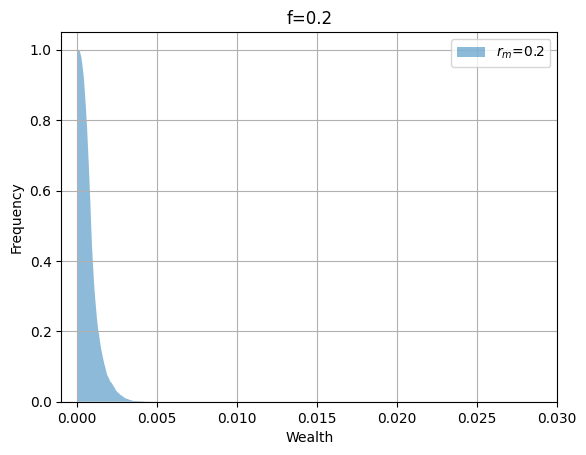

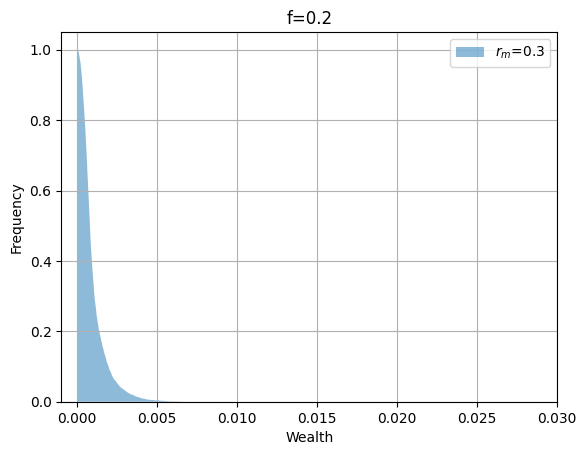

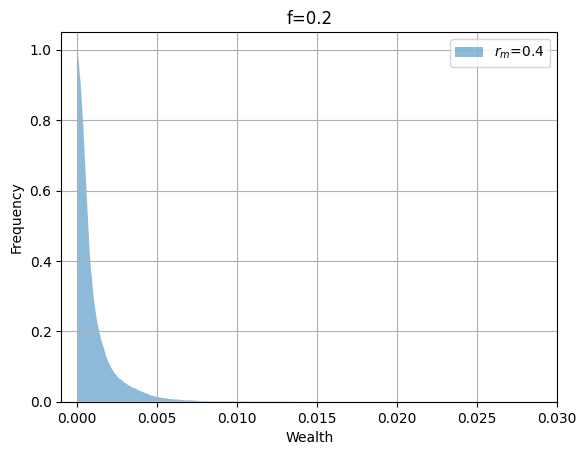

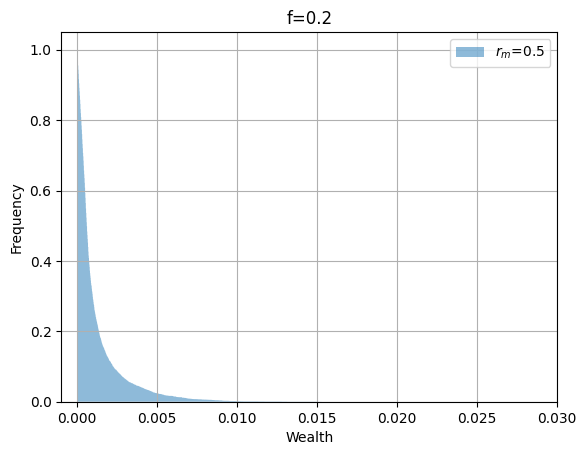

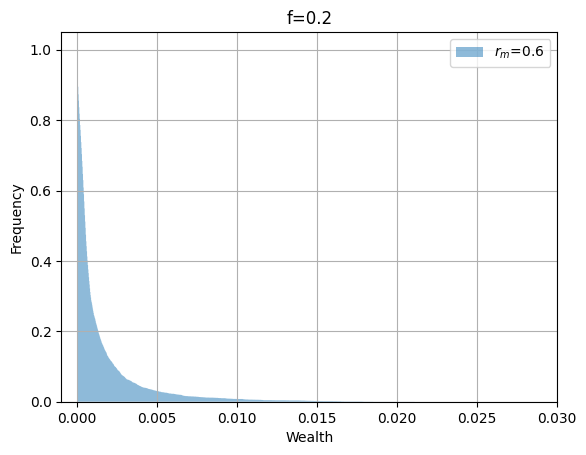

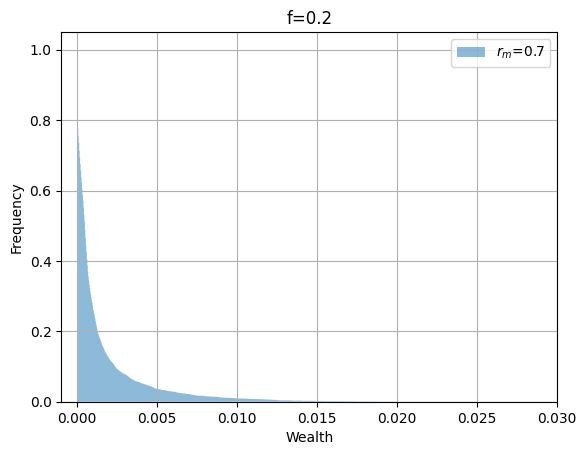

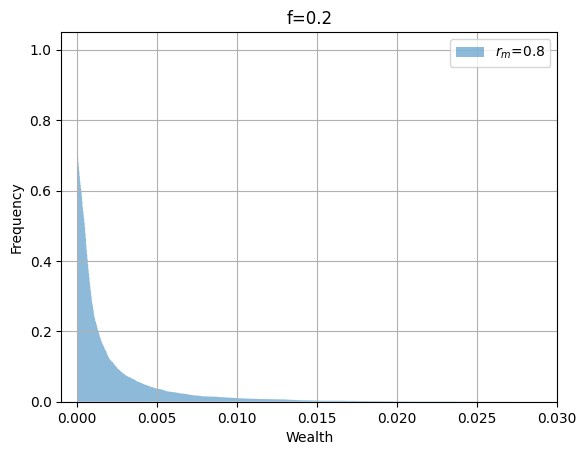

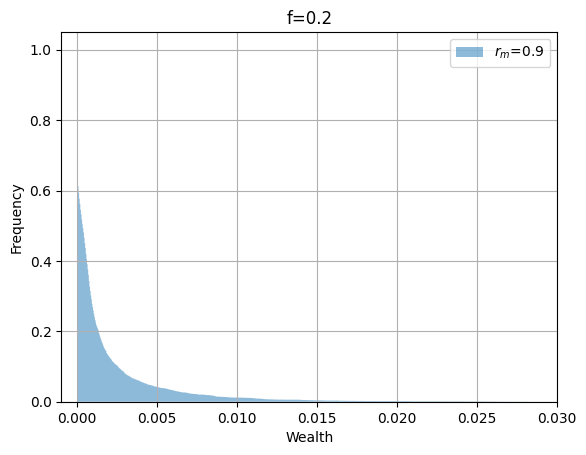

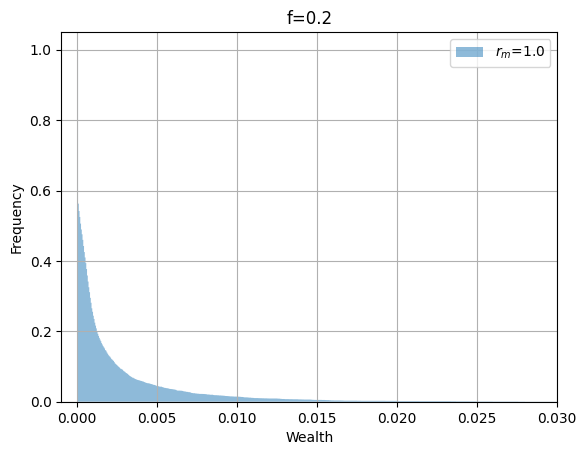

In [4]:
for r, wealths in zip(rs, wealth_reshaped):
    fig, ax = plt.subplots()
    ax.hist(wealths, bins=1000, label=r'$r_{m}$'+f'={r}', alpha=.5, histtype='stepfilled', density=True, cumulative=-1)
    ax.legend()
    ax.set_xlabel('Wealth')
    ax.set_ylabel('Frequency')
    ax.set_title(f'f={f}')
    plt.grid()
    ax.set_xlim(-.001, .03)
plt.show()

In [5]:
# Wealth distribution plot, one for each f
wealths_final = []

f=0.2
wealths_ensemble = np.load(f'data/wealths_ensemble_f={f}_mcs=200000_various_r_max.npy')
wealth_reshaped = []
for j in range(wealths_ensemble.shape[1]):
    wealth_reshaped.append(np.array([wealths_ensemble[i][j] for i in range(5)]))
    wealth_reshaped[j] = wealth_reshaped[j].flatten()

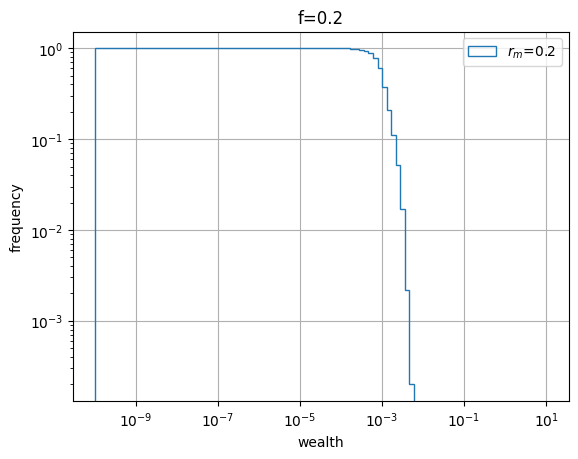

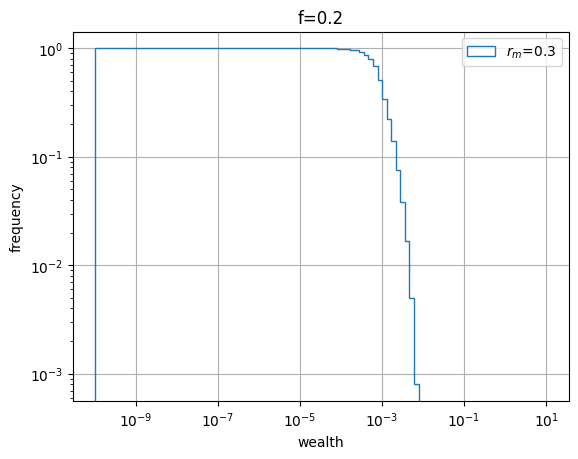

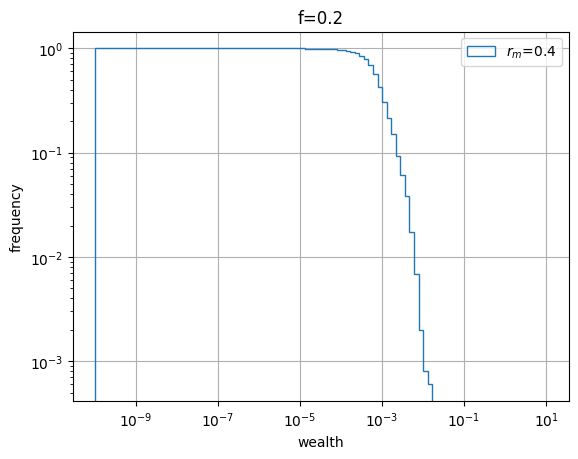

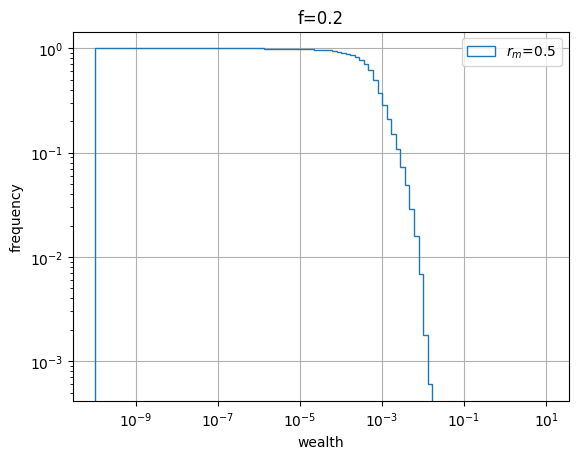

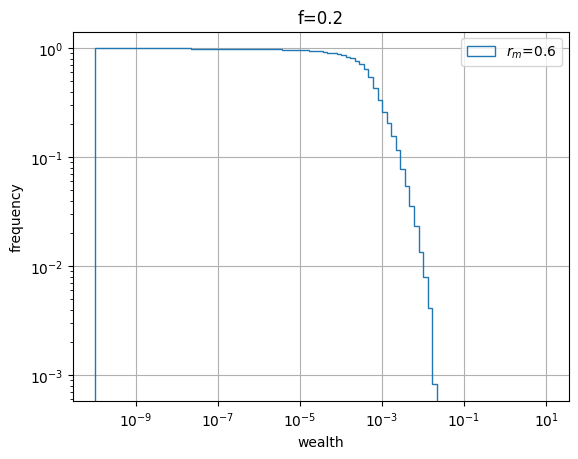

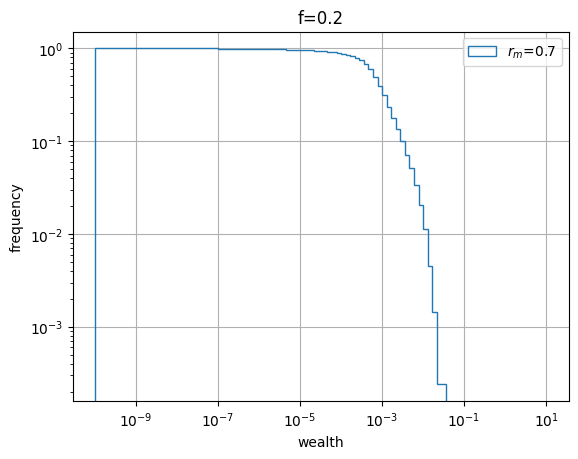

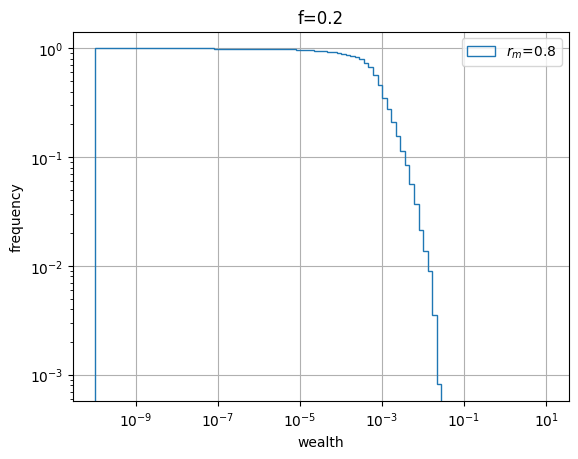

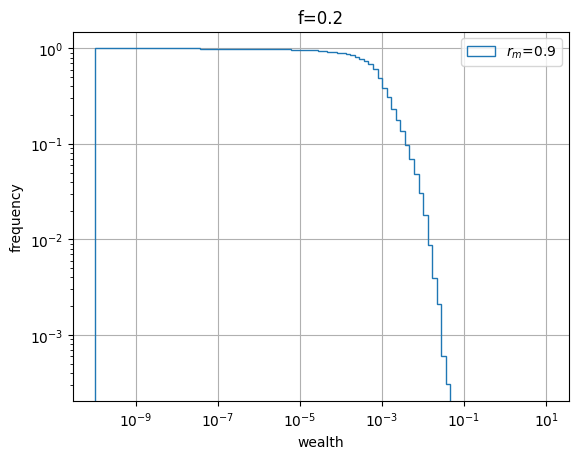

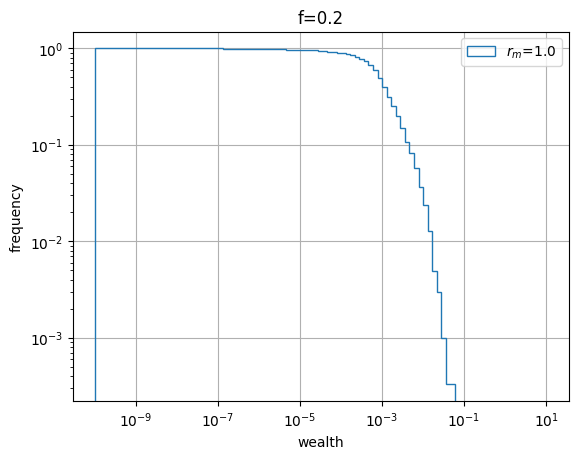

In [6]:
# Log wealth distribution plot, one for each f, wealths ensemble already present
for r, wealths in zip(rs, wealth_reshaped):
    fig, ax = plt.subplots()
    logbins = np.logspace(-10, 1, 100)
    ax.hist(wealths, bins=logbins, label=r'$r_{m}$'+f'={r}', alpha=1, histtype='step', density=True, cumulative=-1)
    ax.legend()
    ax.set_xlabel('wealth')
    ax.set_ylabel('frequency')
    ax.set_title(f'f={f}')
    plt.grid()

    ax.set_yscale('log')
    ax.set_xscale('log')
    # ax.set_xlim(-.001, .04)
plt.show()
